In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import check_random_state
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import missingno as msno
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import math
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from kcluster import KCluster, OverlappingCluster
import copy

# Load data


In [2]:
data = pd.read_csv('C:/Users/wanyi/Desktop/Research Design/Clustering/Cust_agg_without_trend_Oct_7.csv', index_col = 0)

In [3]:
data[data.user_id == 52684]

,user_id,days_since_prior_order,days_since_prior_order_median,order_number,nut_rel_price_ratio,order_dow_0,order_dow_1,order_dow_2,order_dow_3,order_dow_4,...,order_max_min,rel_price_basket_sum,rel_price_basket_mean,nut_score_basket_median,nut_score_basket_mean,nut_score_above_5,nut_rel_price_ratio_mean_per_customer,total_number_of_items_bought,number_of_unqiue_items_bought,%_of_repetition
52656,52684,16.502732,19.0,16,114913.326654,11.0,77.0,26.0,44.0,0.0,...,2,14.693636,0.918352,5.458333,5.500993,119,627.941676,183.0,68,0.371585


In [4]:
pd.set_option('display.max_rows', 200)
data.isnull().any().any()

False

In [5]:
len(sorted(set(data.user_id))) #206123

206094

# feature engingeering add-on

In [7]:
# Weekend vs non-weekend shopping 
'''
data["weekend_purchases"] = data.order_dow_0 + data.order_dow_6
data["weekday_purchases"] = data.order_dow_1 + data.order_dow_2 + data.order_dow_3 + data.order_dow_4 + data.order_dow_5

# Three periods of shopping time 
data["cold_hour_purchases"] = data.order_hour_of_day_21 + data.order_hour_of_day_22 + data.order_hour_of_day_23 + data.order_hour_of_day_0 + data.order_hour_of_day_1 + data.order_hour_of_day_2 + data.order_hour_of_day_3 + data.order_hour_of_day_4 +data.order_hour_of_day_5+data.order_hour_of_day_6+data.order_hour_of_day_7
data["hot_hour_purchases"]  = data.order_hour_of_day_8 + data.order_hour_of_day_9 + data.order_hour_of_day_10 + data.order_hour_of_day_11 + data.order_hour_of_day_12 + data.order_hour_of_day_13 + data.order_hour_of_day_14 + data.order_hour_of_day_15 + data.order_hour_of_day_16 + data.order_hour_of_day_17 + data.order_hour_of_day_18 + data.order_hour_of_day_19 + data.order_hour_of_day_20
'''

'\ndata["weekend_purchases"] = data.order_dow_0 + data.order_dow_6\ndata["weekday_purchases"] = data.order_dow_1 + data.order_dow_2 + data.order_dow_3 + data.order_dow_4 + data.order_dow_5\n\n# Three periods of shopping time \ndata["cold_hour_purchases"] = data.order_hour_of_day_21 + data.order_hour_of_day_22 + data.order_hour_of_day_23 + data.order_hour_of_day_0 + data.order_hour_of_day_1 + data.order_hour_of_day_2 + data.order_hour_of_day_3 + data.order_hour_of_day_4 +data.order_hour_of_day_5+data.order_hour_of_day_6+data.order_hour_of_day_7\ndata["hot_hour_purchases"]  = data.order_hour_of_day_8 + data.order_hour_of_day_9 + data.order_hour_of_day_10 + data.order_hour_of_day_11 + data.order_hour_of_day_12 + data.order_hour_of_day_13 + data.order_hour_of_day_14 + data.order_hour_of_day_15 + data.order_hour_of_day_16 + data.order_hour_of_day_17 + data.order_hour_of_day_18 + data.order_hour_of_day_19 + data.order_hour_of_day_20\n'

In [6]:
#### To add prices ####
#cols_for_clustering_kmean = ["days_since_prior_order_median","order_number","total_number_of_items_bought","%_of_repetition",
                       #"Q1_scr_list","Q2_scr_list","Q3_scr_list","Q4_scr_list","nut_score_basket_median","price_basket_sum","price_basket_median"]
                       #"order_max_mean","number_of_unqiue_items_bought","weekend_purchases","weekday_purchases","hot_hour_purchases","cold_hour_purchases"]
cols_for_clustering_kmean = ["days_since_prior_order_median","order_number","total_number_of_items_bought","%_of_repetition",
                              "nut_score_basket_median","rel_price_basket_sum","nut_rel_price_ratio_mean_per_customer"] ###James to change to rel_price
                             #,"rel_price_basket_mean","nut_score_above_5_percent"] --> not good differentiator 
                       
print(len(cols_for_clustering_kmean))
'''
cols_for_clustering_kcluster = ["days_since_prior_order_median","order_number","total_number_of_items_bought",
                      "nut_score_basket_median","nut_score_trend_Q1_Q2_Q3_Q4","nut_score_basket_median","rel_price_basket_sum"]
print(len(cols_for_clustering_kcluster))
'''
#data_clustering = pd.get_dummies(data= data_clustering, columns=["nut_score_trend_Q1_Q2_Q3_Q4"])

7


'\ncols_for_clustering_kcluster = ["days_since_prior_order_median","order_number","total_number_of_items_bought",\n                      "nut_score_basket_median","nut_score_trend_Q1_Q2_Q3_Q4","nut_score_basket_median","rel_price_basket_sum"]\nprint(len(cols_for_clustering_kcluster))\n'

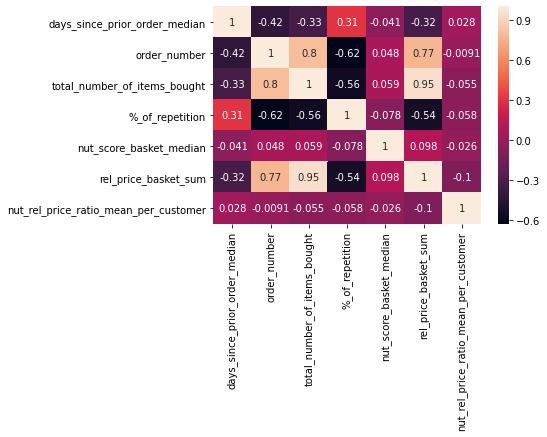

In [7]:
c = data[cols_for_clustering_kmean]
a = c.corr()
sns.heatmap(a,annot=True)

In [8]:
cols_for_clustering_kmean = ["days_since_prior_order_median","rel_price_basket_sum","nut_rel_price_ratio_mean_per_customer"] # "nut_score_basket_median",
#"total_number_of_items_bought","order_number" removed b/c of similarity with rel_price_basket_sum

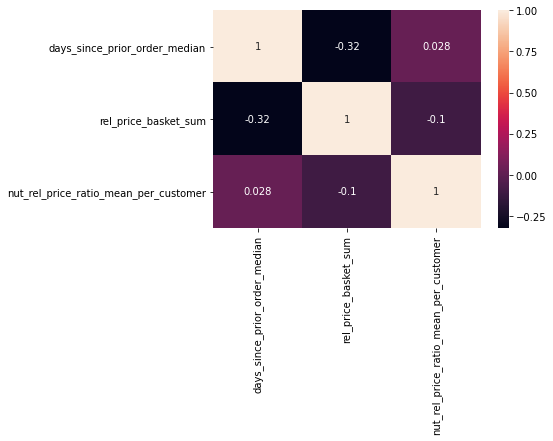

In [9]:
c = data[cols_for_clustering_kmean]
a = c.corr()
sns.heatmap(a,annot=True)

In [10]:
df = data.sample(frac=1).reset_index(drop=True)
x_train = df[:round(df.shape[0]*0.7)]
x_test  = df[round(df.shape[0]*0.7)+1:]
print(x_train.shape, x_test.shape)

(144266, 162) (61827, 162)


In [11]:
x_train_kmean = x_train.loc[:,cols_for_clustering_kmean]
x_test_kmean = x_test.loc[:,cols_for_clustering_kmean]
#x_train_kcluster = x_train.loc[:,cols_for_clustering_kcluster]
#x_test_kcluster = x_test.loc[:,cols_for_clustering_kcluster]

# Method 1: K-means

###  Scaling - to unscale back 

In [12]:
SS = StandardScaler().fit(x_train_kmean)
MMS = MinMaxScaler().fit(x_train_kmean)
train_kmean = SS.transform(x_train_kmean)
test_kmean  = SS.transform(x_test_kmean)
#SS.inverse_transform(train_kmean)

# PCA (Don't run)

In [27]:
'''
from sklearn.decomposition import PCA 
pca_model = PCA() 
pca_model.fit(train_kmean)

#pca_transformed is an array 
pca_transformed = pca_model.transform(train_kmean)
plt.plot(pca_model.explained_variance_ratio_,'-o')

a = np.dot(pca_transformed,pca_model.components_)
print(a.shape)
a

b = train_kmean
print(b.shape)
b

loadings = pd.DataFrame(pca_model.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], 
                                                          index=cols_for_clustering_kmean)
loadings

loadings = pca_model.components_.T * np.sqrt(pca_model.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], 
                                                          index=cols_for_clustering_kmean)
loading_matrix
'''

"\nfrom sklearn.decomposition import PCA \npca_model = PCA() \npca_model.fit(train_kmean)\n\n#pca_transformed is an array \npca_transformed = pca_model.transform(train_kmean)\nplt.plot(pca_model.explained_variance_ratio_,'-o')\n\na = np.dot(pca_transformed,pca_model.components_)\nprint(a.shape)\na\n\nb = train_kmean\nprint(b.shape)\nb\n\nloadings = pd.DataFrame(pca_model.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], \n                                                          index=cols_for_clustering_kmean)\nloadings\n\nloadings = pca_model.components_.T * np.sqrt(pca_model.explained_variance_)\nloading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], \n                                                          index=cols_for_clustering_kmean)\nloading_matrix\n"

# K-means over Scaled data

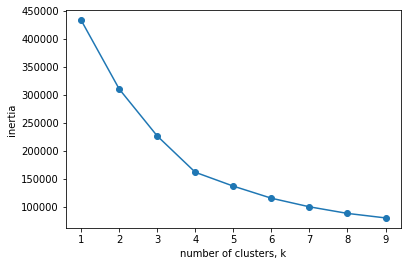

In [42]:
#Finding the number of cluster using the elbow rule 
ks = range(1,10) 
inertias = []
for k in ks:
    model = KMeans(n_clusters=k,n_init = 30, random_state = 2020)
    model.fit(train_kmean)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks()
plt.show()

In [13]:
#Interpretation of the inertia graph 
#Based on the graph, inertia started to slowly change less and less at N=4. As such, we take N=3 as the "Elbow" or optimal number of cluster
#Finding the clustering label 
model_kmean = KMeans(n_clusters = 4,n_init = 20, random_state = 2020)
labels_train_kmean = model_kmean.fit_predict(train_kmean)

In [14]:
# Model Evaluation using Silhoette_score:

for i in tqdm(range(3,7)):
    model_train_n = KMeans(n_clusters = i,n_init = 10, random_state = 2020)
    labels_train_n = model_train_n.fit_predict(train_kmean)
    sht_score_n = silhouette_score(train_kmean, labels_train_n)
    print("when n =",i , "sil_score is =", sht_score_n )


 25%|████████████████████▊                                                              | 1/4 [05:57<17:52, 357.62s/it]

when n = 3 sil_score is = 0.4101390479040686


 50%|█████████████████████████████████████████▌                                         | 2/4 [12:25<12:13, 366.70s/it]

when n = 4 sil_score is = 0.4319983585308116


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [19:02<06:15, 375.66s/it]

when n = 5 sil_score is = 0.40320720292736073


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [25:13<00:00, 378.27s/it]

when n = 6 sil_score is = 0.386452086803037


Text(0.5, 0, 'Customer Segments')

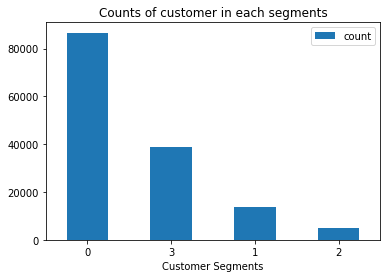

In [16]:
label_train_series = pd.Series(labels_train_kmean).value_counts()
count_table = label_train_series.to_frame().reset_index()
count_table.rename(columns = {"index":"label",0:"count"},inplace = True)
count_table.plot.bar(x='label', y='count', rot=0)
plt.title("Counts of customer in each segments")
plt.xlabel("Customer Segments")

In [18]:
count_table

,label,count
0,0,86637
1,3,38951
2,1,13911
3,2,4767


In [19]:
centroid_train_kmean = model_kmean.cluster_centers_ 
centroid_table_train_kmean = pd.DataFrame(centroid_train_kmean, columns = cols_for_clustering_kmean)
centroid_table_train_kmean

,days_since_prior_order_median,rel_price_basket_sum,nut_rel_price_ratio_mean_per_customer
0,-0.508903,-0.170308,-0.116504
1,-0.800071,2.449760,-0.177406
2,0.172085,-0.570707,3.754640
3,1.398371,-0.427614,-0.135416


In [20]:
centroid_table_train_kmean = pd.DataFrame(SS.inverse_transform(centroid_train_kmean), columns = cols_for_clustering_kmean)
centroid_table_train_kmean

,days_since_prior_order_median,rel_price_basket_sum,nut_rel_price_ratio_mean_per_customer
0,9.157178,9.560389,575.800399
1,6.646560,51.041262,548.683509
2,15.029047,3.221287,2299.449897
3,25.602780,5.486733,567.380011


In [ ]:
#FAMILY? SINGLE? OLD/YOUNG people

# This is the explanation:

#type 1     : least frequent buyer, most money spent, lowest number of items, less healthier 
#type 2 name:  

#type 0     : moderate frequent buyer, most healthy, modersate high rel_price
#type 0 name:  

#type 3     : moderate frequent buyer, lower total number bought, low rel_price 
#type 3 name: lest frequent, low budeget, less unhealthy buyer 

#type 2     : most frequent weekly, largest total number of items and orders, healthy, spend the most, least repetitive 
#type 2 name: high frequent, healthier customers 

In [ ]:
train_3D_plot = pd.DataFrame(train_kmean, columns = cols_for_clustering_kmean)
train_3D_plot["customer_type"] = labels_train_kmean

#cols_for_clustering_kmean = ["days_since_prior_order_median","order_number","total_number_of_items_bought","%_of_repetition",
                              #"nut_score_basket_median","rel_price_basket_sum","rel_price_basket_mean"]


import plotly.express as px
fig_train = px.scatter_3d(train_3D_plot, x='nut_rel_price_ratio_mean_per_customer', y='days_since_prior_order_median', z='rel_price_basket_sum',
              color='customer_type')
fig_train.show()

## Validation

In [15]:
labels_test_kmean = model_kmean.fit_predict(test_kmean)
print(labels_test_kmean)
print(len(labels_test_kmean))

[3 0 3 ... 3 0 1]
61827


In [19]:
pd.Series(labels_test_kmean).value_counts()

3    37234
0    16659
1     5877
2     2057
dtype: int64

In [23]:
centroid_test_kmean = model_kmean.cluster_centers_ 
centroid_table_test_kmean = pd.DataFrame(centroid_test_kmean, columns = cols_for_clustering_kmean)
centroid_table_test_kmean

,days_since_prior_order_median,rel_price_basket_sum,nut_rel_price_ratio_mean_per_customer
0,-0.810292,2.417480,-0.175214
1,1.399733,-0.428231,-0.131258
2,0.106684,-0.547833,3.569312
3,-0.508259,-0.174376,-0.126749


In [24]:
centroid_table_test_kmean = pd.DataFrame(SS.inverse_transform(centroid_test_kmean), columns = cols_for_clustering_kmean)
centroid_table_test_kmean

,days_since_prior_order_median,rel_price_basket_sum,nut_rel_price_ratio_mean_per_customer
0,6.558434,50.530198,549.659697
1,25.614524,5.476956,569.231342
2,14.465116,3.583424,2216.931507
3,9.162728,9.495994,571.239024


In [ ]:
test_3D_plot_test = pd.DataFrame(test_kmean, columns = cols_for_clustering_kmean)
test_3D_plot_test["customer_type"] = labels_test_kmean

import plotly.express as pxrel_
fig_test = px.scatter_3d(test_3D_plot_test, x='nut_rel_price_ratio_mean_per_customer', y='days_since_prior_order_median', z='rel_price_basket_sum',
              color='customer_type')
fig_test.show()

In [27]:
diff0 = (centroid_train_kmean[0]- centroid_test_kmean[3])/centroid_train_kmean[0] # this has a significant change in the centroid
diff1 = (centroid_train_kmean[1]- centroid_test_kmean[0])/centroid_train_kmean[1]
diff2 = (centroid_train_kmean[2]- centroid_test_kmean[2])/centroid_train_kmean[2]
diff3 = (centroid_train_kmean[3]- centroid_test_kmean[1])/centroid_train_kmean[3]

print("Type0 centroid moved by percentage",diff0)
print("Type1 centroid moved by percentage",diff1)
print("Type2 centroid moved by percentage",diff2)
print("Type3 centroid moved by percentage",diff3)

Type0 centroid moved by percentage [ 0.00126468 -0.02388275 -0.0879315 ]
Type1 centroid moved by percentage [-0.0127744   0.01317701  0.01235821]
Type2 centroid moved by percentage [0.38005362 0.04007967 0.04935974]
Type3 centroid moved by percentage [-0.00097402 -0.00144424  0.03070476]


# Append labels back to original Dataframe

In [34]:
print("train_rows:", len(labels_train_kmean),"test_rows:",len(labels_test_kmean))

train_rows: 144266 test_rows: 61827


In [35]:
#cols_merged = cols_for_clustering_kmean + ["kmean_cust_type"]
x_train["kmean_cust_type"] = labels_train_kmean
df_kmean_train = copy.deepcopy(x_train)
df_kmean_train

x_test["kmean_cust_type"] = labels_test_kmean
df_kmean_test = copy.deepcopy(x_test)
df_kmean_test

mergerd_df_kmean = pd.concat([df_kmean_train,df_kmean_test])
#mergerd_df_kmean.sort_values(by=['user_id'],inplace = True)
#mergerd_df_kmean = mergerd_df_kmean.reset_index()

C:\Users\wanyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\wanyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
sorted(set(mergerd_df_kmean.user_id))[-1]

206209

In [39]:
mergerd_df_kmean.to_csv("C:/Users/wanyi/Desktop/Research Design/Clustering/Cust_agg_without_trend_Oct_7_labelled.csv")

# Examine 20k user clusters

In [5]:
import pandas as pd

labelled_user = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Clustering/Cust_agg_without_trend_Oct_7_labelled.csv",usecols= ["user_id","kmean_cust_type"])
#two_thousands_user = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Clustering/20kusers_new.csv")
#two_thousands_user = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Clustering/valid_5k_basket4.csv")

In [6]:
labelled_user[labelled_user.user_id == 52684]

,user_id,kmean_cust_type


In [57]:
labelled_user.sort_values("user_id")

,user_id,kmean_cust_type
164647,1,1
66063,2,0
12615,3,0
195762,4,1
40763,5,0
...,...,...
122775,206205,0
189509,206206,3
185083,206207,3
152985,206208,0


In [60]:
df_merge = pd.merge(two_thousands_user,labelled_user,on="user_id",how = "left")

In [61]:
df_merge.kmean_cust_type.value_counts()

0.0    2414
3.0    1776
1.0     728
2.0     178
Name: kmean_cust_type, dtype: int64

In [62]:
df_merge.to_csv("C:/Users/wanyi/Desktop/Research Design/Clustering/Reshma_validation_5k_labelled.csv")

In [ ]:
value_count_table = mergerd_df_kmean[["nut_score_trend_Q1_Q2_Q3_Q4","kmean_cust_type"]]
value_count_table

In [ ]:
def plot_distribution(df):
    val_count = df.nut_score_trend_Q1_Q2_Q3_Q4.value_counts()
    count_table = pd.DataFrame(val_count).reset_index()
    print("Ratio down/fixed:", count_table.iloc[1,1]/count_table.iloc[0,1])
    print("Ratio up/fixed:", count_table.iloc[2,1]/count_table.iloc[0,1])
    count_table.rename(columns = {"index":"label","nut_score_trend_Q1_Q2_Q3_Q4":"count"},inplace = True)
    count_table.plot.bar(x='label', y='count', rot=0)

In [ ]:
df_cust0 = value_count_table[value_count_table.kmean_cust_type == 0]
df_cust1 = value_count_table[value_count_table.kmean_cust_type == 1]
df_cust2 = value_count_table[value_count_table.kmean_cust_type == 2]
df_cust3 = value_count_table[value_count_table.kmean_cust_type == 3]
df_list = [df_cust0,df_cust1,df_cust2,df_cust3]

In [ ]:
for i in df_list:
    plot_distribution(i)

In [ ]:
mergerd_df_kmean

In [ ]:
label_map_kmean = mergerd_df_kmean[["user_id","kmean_cust_type"]]
label_map_kmean

# ......................................... End of K-mean .........................................

# Method 2: K-cluster

In [ ]:
cols_for_clustering_kcluster

In [ ]:
train_kcluster = copy.deepcopy(x_train_kcluster)
test_kcluster  = copy.deepcopy(x_test_kcluster)

# K-means over PCA/Scaled data

'''
#Finding the number of cluster using the elbow rule 
ks = range(1,15) 
inertias = []
for k in ks:
    model = KCluster(n_clusters=k,n_init = 20,random_state = 2020)
    model.fit(train_kcluster)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks()
plt.show()
''' 

In [ ]:
#Interpretation of the inertia graph 
#Based on the graph, inertia started to slowly change less and less at N=4. As such, we take N=4 as the "Elbow" or optimal number of cluster
#Finding the clustering label 
model_kcluster = KCluster(n_clusters = 4,n_init = 20)
'''
for i in tqdm(range(2,5)):
    model_train_n = KMeans(n_clusters = i,n_init = 20, random_state = 2020)
    labels_train_n = model_train_n.fit_predict(train_kmean)
    sht_score_n = silhouette_score(train_kmean, labels_train_n)
    print("when n =",i , "sil_score is =", sht_score_n )
'''


In [ ]:
model_kcluster.fit(train_kcluster)
labels_train_kcluster = model_kcluster.predict(train_kcluster)

In [ ]:
labels_train_kcluster = copy.deepcopy(labels_train_kcluster[0].tolist())
label_train_series_cluster = pd.Series(labels_train_kcluster).value_counts()
count_table = label_train_series_cluster.to_frame().reset_index()
count_table.rename(columns = {"index":"label",0:"count"},inplace = True)
count_table.plot.bar(x='label', y='count', rot=0)

In [ ]:
centroid_train_kcluster = model_kcluster.cluster_centers_ 
centroid_train_kcluster

In [ ]:
centroid_train_kcluster = model_kcluster.cluster_centers_ 
centroid_table_train_kcluster = pd.DataFrame(centroid_train_kcluster, columns = cols_for_clustering_kcluster)


In [ ]:
# This is the explanation before adding 1) price 2) weekday vs weekend 3) hot/cold hours purchases. 

#type 0: most frequent buyer, lots of order, 2nd largest number of items, highly repetitive, no too healthy in middle, in general not too healthy
#type 1: least frequent buyer, least order of item, least reptitive, 2nd healthy 
#type 2: 2nd most frequent buyer,  least total number, moderate reptition, most healthy
#type 3: 2nd most frequent buyer,  2nd most order, most total number, moderate reptition, moderate healthy
#type 4: 2nd least frequent buyer,  moderate order number, least total number, moderate reptition, worst healthy

In [ ]:
train_3D_plot = pd.DataFrame(train_kcluster, columns = cols_for_clustering_kcluster)
train_3D_plot["customer_type"] = labels_train_kcluster

import plotly.express as px
fig_train = px.scatter_3d(train_3D_plot, x='nut_score_basket_median', y='rel_price_basket_sum', z='days_since_prior_order_median',
              color='customer_type')
fig_train.show()


## Validation

In [ ]:
labels_test_cluster = model_kcluster.fit(test_kcluster).predict(test_kcluster)
print(labels_test_cluster)

In [ ]:
centroid_test_kcluster = model_kcluster.cluster_centers_ 
centroid_table_test_kcluster = pd.DataFrame(centroid_test, columns = cols_for_clustering_kcluster)
centroid_table_test_kcluster

In [ ]:
test_3D_plot_test = pd.DataFrame(test_kcluster, columns = cols_for_clustering_kcluster)
test_3D_plot_test["customer_type"] = labels_test_kcluster

import plotly.express as px
fig_test = px.scatter_3d(test_3D_plot_test, x='nut_score_basket_median', y='Q4_scr_list', z='days_since_prior_order_median',
              color='customer_type')
fig_test.show()



In [ ]:
diff0 = (centroid_train_kcluster[0]- centroid_test_kcluster[2])/centroid_train_kcluster[0] # this has a significant change in the centroid
diff1 = (centroid_train_kcluster[1]- centroid_test_kcluster[0])/centroid_train_kcluster[1]
diff2 = (centroid_train_kcluster[2]- centroid_test_kcluster[3])/centroid_train_kcluster[2]
diff3 = (centroid_train_kcluster[3]- centroid_test_kcluster[1])/centroid_train_kcluster[3]

print("Type0 centroid moved by percentage",diff0)
print("Type1 centroid moved by percentage",diff1)
print("Type2 centroid moved by percentage",diff2)
print("Type3 centroid moved by percentage",diff3)

# Feature importance 

In [ ]:
xtrain = data.

clf=RandomForestRegressor()
clf.fit(xtrain, ytrain)
importantscores=dict(zip(xtrain.columns,clf.feature_importances_))
x = importantscores
import matplotlib.pyplot as plt
plot={k: v for k, v in sorted(x.items(), key=lambda item: item[1])[::-1]}

plt.rcParams["figure.figsize"] = (30,5)
feature=list(plot.keys())[:3]
importance=list(plot.values())[:3]
plt.bar(feature, importance)
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importance')

plt.show()

# DBSCAN over PCA/Scaled data

In [ ]:
#Determine epsilon 
nbrs = NearestNeighbors(n_neighbors = round(math.log(len(train)))).fit(train)
distances, indices = nbrs.kneighbors(train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 0.3 , min_samples = np.log(train.shape[0])).fit(train)
#For number of min_samples, I used ln(n), where n is the total number of points to be clustered per Utku's Canvas annoucement 
# For eps, I used 0.3 based on estimation in the following code block below. 
labels_dbsc = dbsc.labels_
core_samples = np.zeros_like(labels_dbsc, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

unique_labels = np.unique(labels_dbsc)
print(unique_labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = train[class_member_mask & core_samples]
    plt.plot(xy[:,3],xy[:,2], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = train[class_member_mask & ~core_samples]
    plt.plot(xy2[:,3],xy2[:,2], 'o', markerfacecolor = color, markersize = 10)
plt.title("DBSCAN on train_data_scaled")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(unique_labels)

# t-SNE

In [ ]:
model = TSNE(learning_rate = 100, perplexity=math.sqrt(train_data_Tsne.shape[1]) )
Tsne_transformed = model.fit_transform(pca_transform)


In [ ]:
xs = Tsne_transformed[:,0]
ys = Tsne_transformed[:,1]
plt.scatter(xs,ys, alpha=0.5)
for x, y, customer in zip(xs, ys, customer_id):
    plt.annotate(customer, (x, y), fontsize=10, alpha=0.75)
plt.show()
plt.figure(figsize = (60,60))

In [ ]:
y = df2.TransactionRevenue
x = df2.visitNumber
plt.scatter(x, y)



In [ ]:
df_revenue_pageview_hit = df2.iloc[:,1:4]

corr = df_revenue_pageview_hit.corr(method ='pearson') 
import matplotlib.pyplot as plt
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)